# Visualização Inicial dos dados

In [64]:
import pandas as pd

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../../data/letterboxd_Curitiba.csv')

# Visualização de algumas linhas de dados
df

Film_title  Release_year                   Director  \
0                  Aqui e Agora        2024.0             Vinícius Dórea   
1                 Junho de 2002        2024.0                 Tainá Lima   
2                      Mergulho        2023.0   Breno Silva, Wilson Neto   
3                    Sétimo Dia        2023.0  Vinícius Dórea, João Ives   
4                       Maestro        2023.0             Bradley Cooper   
...                         ...           ...                        ...   
32097  Inception: The Cobol Job        2010.0                  Ian Kirby   
32098                     Saint        2010.0                  Dick Maas   
32099                The Shrine        2010.0                 Jon Knautz   
32100          The Piano Forest        2007.0            Masayuki Kojima   
32101           Thru the Mirror        1936.0                 David Hand   

                                                    Cast  Average_rating  \
0      ['Andrey Icaro', 'Letícia Silva', 'Vivian Evel...             NaN   
1                                                    NaN             NaN   
2      ['Benício Júnior', 'Pedro Bagano', 'Lívia Mari...             NaN   
3      ['Ligia Borges', 'Raianny Ferreira', 'Vivian E...             NaN   
4      ['Carey Mulligan', 'Bradley Cooper', 'Matt Bom...            3.15   
...                                                  ...             ...   
32097  ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...            3.59   
32098  ['Huub Stapel', 'Egbert Jan Weeber', 'Caro Len...            2.71   
32099  ['Aaron Ashmore', 'Cindy Sampson', 'Meghan Hef...            2.67   
32100  ['Aya Ueto', 'Hiroyuki Amano', 'Mayuko Fukuda'...            3.58   
32101  ['Walt Disney', 'Billy Bletcher', 'Pinto Colvi...            3.73   

       Curitiba_average_rating  \
0                          NaN   
1                          NaN   
2                     3.250000   
3                          NaN   
4                     3.024038   
...                        ...   
32097                      NaN   
32098                      NaN   
32099                      NaN   
32100                 5.000000   
32101                      NaN   

                                                  Genres  Runtime  \
0                                        ['Documentary']      6.0   
1                                                    NaN      9.0   
2                                          ['Adventure']     24.0   
3                                              ['Drama']     22.0   
4                          ['Drama', 'Music', 'Romance']    129.0   
...                                                  ...      ...   
32097  ['Thriller', 'Animation', 'Action', 'Science F...     14.0   
32098                               ['Comedy', 'Horror']     85.0   
32099                                         ['Horror']     85.0   
32100                    ['Music', 'Animation', 'Drama']    101.0   
32101                 ['Comedy', 'Animation', 'Fantasy']      9.0   

                    Countries Original_language  ...       ★★      ★★½  \
0                  ['Brazil']        Portuguese  ...      0.0      0.0   
1      ['Brazil', 'Portugal']        Portuguese  ...      0.0      0.0   
2                  ['Brazil']        Portuguese  ...      0.0      0.0   
3                  ['Brazil']        Portuguese  ...      0.0      0.0   
4                     ['USA']           English  ...  27135.0  35923.0   
...                       ...               ...  ...      ...      ...   
32097           ['UK', 'USA']           English  ...    107.0    170.0   
32098         ['Netherlands']             Dutch  ...    721.0    690.0   
32099              ['Canada']           English  ...    741.0    709.0   
32100               ['Japan']          Japanese  ...     87.0    175.0   
32101                 ['USA']           English  ...    135.0    189.0   

           ★★★     ★★★½     ★★★★    ★★★★½    ★★★★★  Total_ratings  \

# Conversão para formato data

In [65]:
df['Release_year'].dtype

dtype('float64')

In [66]:
df['Release_year'] = pd.to_datetime(df['Release_year'], format='%Y')

df['Release_year']

0       2024-01-01
1       2024-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
32097   2010-01-01
32098   2010-01-01
32099   2010-01-01
32100   2007-01-01
32101   1936-01-01
Name: Release_year, Length: 32102, dtype: datetime64[ns]

# Coletando gêneros únicos

Limpando os dados

In [67]:
df = df.dropna(subset=['Genres']).reset_index(drop=True)

Então vamos listar os gêneros diferentes

In [68]:
df.Genres.unique() # não funciona

array(["['Documentary']", "['Adventure']", "['Drama']", ...,
       "['Drama', 'TV Movie', 'Comedy', 'Horror']",
       "['Adventure', 'Fantasy', 'Music', 'Family']",
       "['Thriller', 'Animation', 'Action', 'Science Fiction']"],
      dtype=object)

In [69]:
df['Genres'].dtype # Genres eh do tipo python object - provavelmente string

dtype('O')

In [70]:
genres = set()

for index, row in df.iterrows():
    genres.update(row['Genres'].strip('][').replace('\'', '').split(', '))

print(genres)

{' and swordplay', 'Intense combat and martial arts', 'Animation', 'Comedy', 'Epic history and literature', 'Historical battles and epic heroism', 'Action', 'Thought-provoking sci-fi action and future technology', 'War', 'Superheroes in action-packed battles with villains', 'Music', 'TV Movie', 'Show All…', 'Fantasy adventure', 'Mystery', 'History', 'Western', 'drugs and gangsters', 'Family', 'sci-fi and the apocalypse', 'Captivating vision and Shakespearean drama', 'Epic heroes', 'Action-packed space and alien sagas', 'Documentary', 'Monsters', 'Romance', 'Air pilot heroism and survival', 'heroism', 'Moving relationship stories', 'and swordplay', 'Drama', 'aliens', 'Epic adventure and breathtaking battles', 'Thriller', 'Horror', 'Fantasy', ' heroism', 'Emotional and captivating fantasy storytelling', 'Science Fiction', 'Adventure', 'Fairy-tale fantasy and enchanted magic', 'Crime'}


Agora vamos verificar quais são os gêneros com uma quantidade significativa de filmes

In [71]:
sel_genres = set()

for genre in genres:
    num_films = df.loc[df['Genres'].str.find(genre) != -1].shape[0]
    if num_films > 10:
        print(genre)
        print(num_films)
        sel_genres.add(genre)

Animation
3617
Comedy
8372
Action
3330
War
615
Music
1719
TV Movie
848
Mystery
1995
History
1066
Western
380
Family
2106
Documentary
4805
Romance
3940
Drama
12997
Thriller
4426
Horror
3934
Fantasy
2397
Science Fiction
2296
Adventure
2449
Crime
2850


In [72]:
print(sel_genres)
print(len(sel_genres))

{'Animation', 'Comedy', 'Action', 'War', 'Music', 'TV Movie', 'Mystery', 'History', 'Western', 'Family', 'Documentary', 'Romance', 'Drama', 'Thriller', 'Horror', 'Fantasy', 'Science Fiction', 'Adventure', 'Crime'}
19


# Visualização

Total de filmes no tempo

In [73]:
df_total = df.loc[df['Release_year'].dt.year < 2024]
df_total = df_total.loc[df_total['Release_year'].dt.year > 1923].reset_index(drop=True)

df_total = df_total[['Release_year', 'Genres']]

#group = df_total.groupby(df_total['Release_year'].dt.year)

#df_total = pd.DataFrame(group.size(), columns = ['Count'])

#df_total.plot(kind='line', color=['k'])

In [74]:
y_rel = {}

for y in range(1923, 2024):
    y_rel[y] = 0

In [75]:
for index, row in df_total.iterrows():
    y_rel[row['Release_year'].year] += 1

y_rel_df = pd.DataFrame(data = {'Release_year': y_rel.keys(), 'Count': y_rel.values()})

y_rel_df

Release_year  Count
0            1923      0
1            1924     23
2            1925     18
3            1926     18
4            1927     23
..            ...    ...
96           2019   1330
97           2020   1332
98           2021   1264
99           2022   1200
100          2023    896

[101 rows x 2 columns]

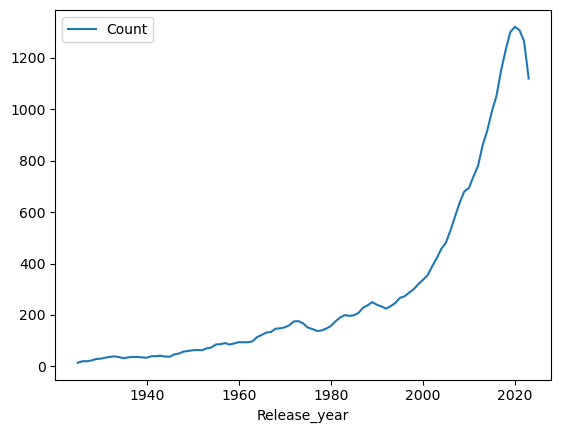

In [77]:
y_rel_df.rolling(window = 3, on = 'Release_year').mean().plot(x = 'Release_year', y = 'Count')
plt.savefig('total_releases')

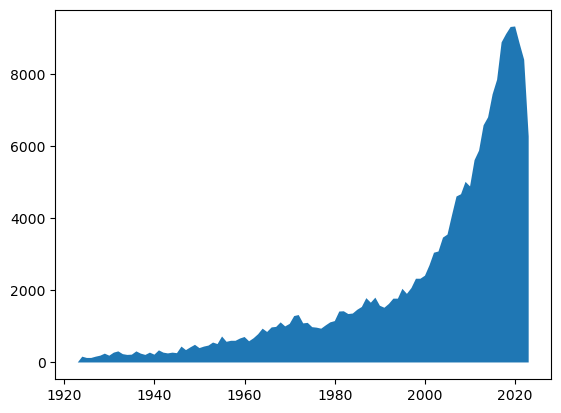

In [62]:
#y_rel_df['Count'].dtype
#y_rel_df.plot(x='Release_year', y='Count')

import matplotlib.pyplot as plt

# Create data
x=y_rel_df['Release_year']
y=y_rel_df['Count']

# Area plot
plt.fill_between(x, y)

In [159]:
#df_comedy = df.loc[df['Genres'].str.find('Comedy') != -1]
#df_comedy = df_comedy.loc[df_comedy['Release_year'].dt.year > 1960].reset_index(drop=True)

#plot = df_comedy.groupby(df_comedy['Release_year'].dt.year)
#plot.size().plot(kind='bar')

Vour iterar manualmente pelos gêneros salvando cada gráfico

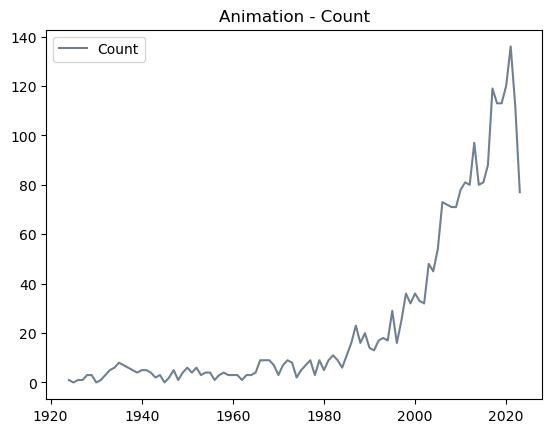

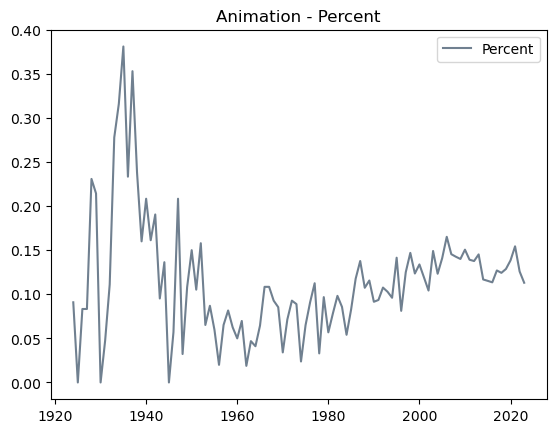

In [211]:

df_genre = df.loc[df['Genres'].str.find('Animation') != -1]
df_genre = df_genre.loc[df_genre['Release_year'].dt.year < 2024]
df_genre = df_genre.loc[df_genre['Release_year'].dt.year > 1923].reset_index(drop=True)

group = df_genre.groupby(df_genre['Release_year'].dt.year)
df_count = pd.DataFrame(group.size(), columns = ['Count'])

df_range = pd.DataFrame(data = list([0] * 100), index=list(range(1924,2024)), columns = ['Count'])
df_range.loc[df_count.index, 'Count'] = df_count['Count']

df_range['Count'] = df_range['Count'].astype(float)

df_range.plot(kind = 'line', color=['slategrey'], title = 'Animation - Count')

df_range.loc[df_range.index, 'Count'] = df_range['Count'] / df_total['Count']

ax = df_range.plot(kind='line', color=['slategrey'], title = 'Animation - Percent')
ax.legend(['Percent'])

<Axes: >

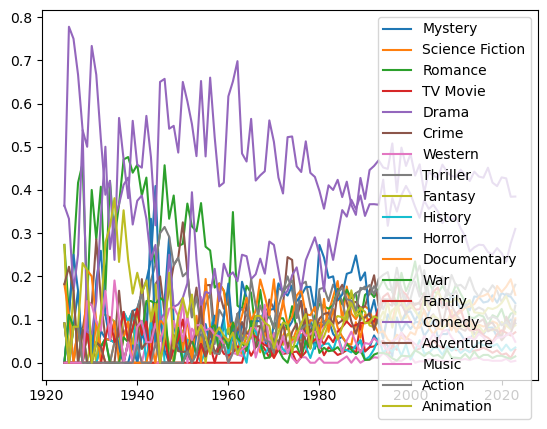

In [222]:
df_unite = pd.DataFrame()
for genre in genres:
    num_films = df.loc[df['Genres'].str.find(genre) != -1].shape[0]
    if num_films > 10:
        df_genre = df.loc[df['Genres'].str.find(genre) != -1]
        df_genre = df_genre.loc[df_genre['Release_year'].dt.year < 2024]
        df_genre = df_genre.loc[df_genre['Release_year'].dt.year > 1923].reset_index(drop=True)
        
        group = df_genre.groupby(df_genre['Release_year'].dt.year)
        df_count = pd.DataFrame(group.size(), columns = [genre])
        
        df_range = pd.DataFrame(data = list([0] * 100), index=list(range(1924,2024)), columns = [genre])        
        df_range.loc[df_count.index, genre] = df_count[genre]
        
        df_range[genre] = df_range[genre].astype(float)
        
        #df_range.plot(kind = 'line', color=['slategrey'], title = 'Animation - Count')
        
        df_range.loc[df_range.index, genre] = df_range[genre] / df_total['Count']

        df_unite = pd.concat([df_unite, df_range[genre]], axis=1)
        
        #ax = df_range.plot(kind='line', color=['slategrey'], title = 'Animation - Percent')
        #ax.legend(['Percent'])
df_unite.plot(kind='line')